<a href="https://colab.research.google.com/github/rosridha/MATH152/blob/main/ExploratoryProject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hello! Our names are Jordan Lopez and Rohit Sridhar. In this exploratory project we study the "Random Walk" and important statistcal properties that coincide.
<br>
<br>
First we'd like to explain what exactly the "Random Walk" is. Imagine a person, who is walking on a two dimensional grid (beginning at the origin). He/She has the option to *step* in any direction precisely one unit--up, down, left, or right.
<br>
<br>
This very simple concept can be expressed and seen with the following code where this person takes 5 steps.

In [ ]:
import math

def DistanceFromOrigin(x,y):
  distance = math.sqrt(x**2 + y**2)
  return distance

(0.0,0.0)
(0.0,1.0)
(0.0,0.0)
(0.0,1.0)
(0.0,0.0)
(0.0,-1.0)
(1.0,-1.0)
(1.0,-2.0)
(0.0,-2.0)
(0.0,-3.0)


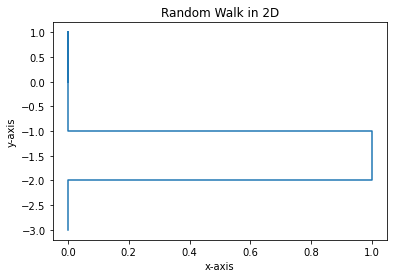

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

xlist = np.zeros(10) # initializing the x values with zeros
ylist = np.zeros(10) # initializing the y values with zeros
x,y = 0,0

for i in range(0, 10): # updating the x, y list with 10 steps
  xlist[i] = x 
  ylist[i] = y
  direction = np.random.choice(['up', 'down', 'left', 'right']) # generating the random movement
  if direction == 'up': # the associated random movements and there (x,y) coordinate increments
    y += 1
  elif direction == 'down':
    y += -1
  elif direction == 'left':
    x += -1
  elif direction == 'right':
    x += 1

for j in range(0,10):
  print("({},{})".format(xlist[j], ylist[j]))
  

# Plot the random walk

plt.plot(xlist, ylist)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Random Walk in 2D')
plt.show()


To take this a step further we want to analyze a couple properties of the Random Walk but with different step sizes. To generate this we create a new function which allows us to input a different number of steps named "RandomWalkSteps" and returns the final values (x,y) of the walk. Here is the associated code:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def RandomWalkSteps(steps):
  xlist = np.zeros(steps)
  ylist = np.zeros(steps)
  x,y = 0,0
  for i in range(0, steps):
    xlist[i] = x 
    ylist[i] = y
    direction = np.random.choice(['up', 'down', 'left', 'right'])
    if direction == 'up':
      y += 1
    elif direction == 'down':
      y += -1
    elif direction == 'left':
      x += -1
    elif direction == 'right':
      x += 1
  List = [xlist[-1],ylist[-1]]
  return List
  

RandomWalkSteps(100)

[-6.0, 5.0]

For our first exploration, we want to see how far the person ends up from the origin, on average, with different steps sizes ie 10, 100 and 1,000

In [ ]:
import math

def dist(n):
    x = n[0]
    y = n[1]
    distance = math.sqrt(x**2 + y**2)
    return distance
    

# average distance from origin with 10 steps
distances = []
for j in range(1000):
  distances.append(dist(RandomWalkSteps(10)))
num = sum(distances)
num = num / 1000.0

print(num) # average: ~ 3 units

# average distance from origin with 100 steps
distances = []
for j in range(1000):
  distances.append(dist(RandomWalkSteps(100)))
num = sum(distances)
num = num / 1000.0

print(num) # average: ~ 9 units

# average distance from origin with 1,000 steps
distances = []
for j in range(1000):
  distances.append(dist(RandomWalkSteps(1000)))
num = sum(distances)
num = num / 1000.0

print(num) # average: ~ 27 units


2.719089895503056
9.159027770870424
28.941162971803763


What we find with this analysis is that as we increase the step size by a power of 10, (ie 10 to 100 to 1,000) we see that the average distance where the person ends up after finished walking is around 3 units, 9 units, and 27 units from the origin -- or powers of 3.

Taking this analysis a step further, we change the step size to be 0.1 units, and plot the distance traveled, using the distance formula, with step increments of 10 starting from 10 going to 500.

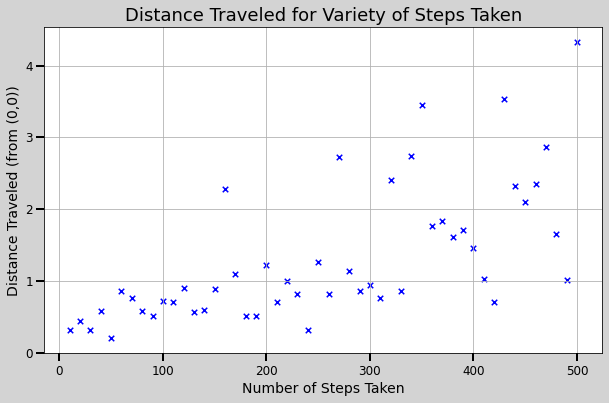

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

def random_walk(num_steps):
    step_size = 0.1
    xlist = np.zeros(num_steps)
    ylist = np.zeros(num_steps)
    x,y = 0,0

    for i in range(0, num_steps):
        xlist[i] = x 
        ylist[i] = y
        direction = np.random.choice(['up', 'down', 'left', 'right'])
        if direction == 'up':
            y += step_size
        elif direction == 'down':
            y += -step_size
        elif direction == 'left':
            x += -step_size
        elif direction == 'right':
            x += step_size

    distance = math.sqrt(x**2 + y**2)
    return distance

num_steps = np.arange(10, 501, 10)
distances = np.zeros(len(num_steps))

for i, n in enumerate(num_steps):
    distances[i] = random_walk(n)

plt.figure(figsize=(10, 6), facecolor='lightgrey')

plt.scatter(num_steps, distances, s=30, c='blue', marker = 'x',)

plt.xlabel('Number of Steps Taken', fontsize=14)
plt.ylabel('Distance Traveled (from (0,0))', fontsize=14)
plt.title('Distance Traveled for Variety of Steps Taken', fontsize=18)
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=12, length=8, width=2, direction='out')

plt.show()


From this graph, we see that as number of steps increases, so does distance traveled from the origin--but definitely not in a linear fashion. Although one might presume that increasing the number of steps would positively increase the distance, there appears to be almost no relationship between the dependent and independent variable. This is due to the 'person' being able to randomly move backwards or closer to the origin and lose progress in terms of distance.

Exploring a wall at x = 0, we can examine what happens if the random walk is not allowed to enter a negative x coordinate.

[0, 1, 1, 0, 0, 0, 1, 1, 2, 3, 3, 2, 2, 3, 3, 3, 3, 4, 3, 3, 3, 2, 2, 2, 1, 0, 0, 0, 0, 0, 1, 1, 2, 3, 3, 4, 5, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8]
[0, 0, -1, -1, -1, 0, 0, -1, -1, -1, -2, -2, -3, -3, -2, -3, -4, -4, -4, -3, -4, -4, -3, -2, -2, -2, -2, -2, -2, -1, -1, 0, 0, 0, -1, -1, -1, -1, -1, -2, -1, -1, -2, -1, -1, 0, -1, -2, -3, -4, -4]


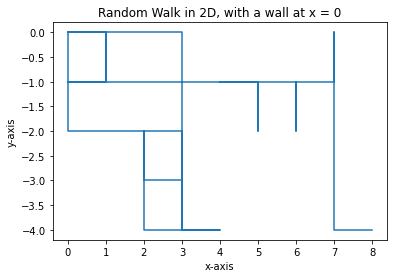

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random


def random_walk_x0_wall(steps):
  xlist = [0]
  ylist = [0]
  for i in range(steps):
    direction = random.choice(['up', 'down', 'left', 'right'])
    if direction == 'up':
      ylist.append(ylist[-1] + 1)
      xlist.append(xlist[-1])

    elif direction == 'down':
      ylist.append(ylist[-1] - 1)
      xlist.append(xlist[-1])

    elif direction == 'left':
      if xlist[-1] == 0:
        xlist.append(0)
      else:
        xlist.append(xlist[-1] - 1)
      
      ylist.append(ylist[-1])

    elif direction == 'right':
      xlist.append(xlist[-1] + 1)
      ylist.append(ylist[-1])


  return xlist, ylist

xlist, ylist = random_walk_x0_wall(50)
print(xlist)
print(ylist)

plt.plot(xlist, ylist)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Random Walk in 2D, with a wall at x = 0')
plt.show()

# COME BACK TO ADD ANALYSIS ABOUT DISTRIBUTION



Exploring gravity, and a floor at `y = 0`. In this function, the random walk is only in the up or down direction, and the probabilities are weighted such that there is a 60% chance of the air molecule choosing down, to simulate gravity.




[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]
[0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 0, 1, 0, 1, 2, 1, 0, 0, 0, 1, 2, 3, 4, 3, 2, 1, 

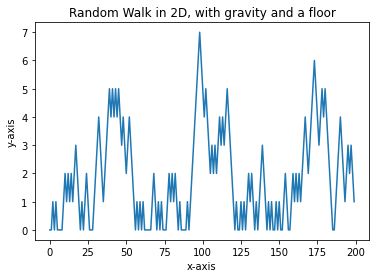

In [ ]:
import random
import matplotlib.pyplot as plt

def random_walk_floor_gravity(steps):
  x_list = [0]
  y_list = [0]
  for i in range(1, steps):
    probability = random.randint(0, 100)
    if probability < 60:
      direction = 'down'
    elif probability >= 60:
      direction = 'up'


    x_list.append(i)
    if direction == 'up':
      y_list.append(y_list[-1] + 1)

    elif direction == 'down':
      if y_list[-1] <= 0:
        y_list.append(0)
      elif y_list[-1] > 0:
        y_list.append(y_list[-1] - 1)

    

  return x_list, y_list

x_list, y_list = random_walk_floor_gravity(200)
print(x_list)
print(y_list)

plt.plot(x_list, y_list)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Random Walk in 2D, with gravity and a floor')
plt.show()

Now we will explore what happens in the random walk in both vertical and horizontal directions when the random walk is limited by bounds (in this example, a box). This box will be 10 x 10 units, centered at (0,0).

[0, 0, 0, 1, 2, 3, 4, 3, 4, 4, 3, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 3, 2, 3, 4, 4, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 3, 2, 1, 0, 0, 0, 0, 0, 1, 2, 2, 3, 3, 2, 3, 3, 4, 3, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 2, 3, 4, 4, 4, 5, 5, 4, 5, 5, 4, 4, 4, 3, 2, 1, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 2, 2, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 5, 5, 4, 4, 5, 5, 5, 4, 4, 4, 4, 4, 3, 4, 3, 4, 4, 4, 3, 3, 3, 3, 2, 1, 1, 1, 0, 0, 1, 1, 1, 2, 3, 4, 5, 4, 5, 5, 5, 5, 4, 4, 3, 3, 2, 3, 3, 3, 2, 2, 2, 1, 0, 0, 0, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 0, -1, 0, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 5, 5, 5, 5, 4, 4, 5, 5, 5, 4, 5, 4, 4, 3, 3, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 3, 2, 1, 0, 1, 1, 0, 1, 0, 1, 1, 2, 1, 0, 1, 2, 1, 2, 2, 1, 1, 0, -1, -1, -1, 0, 1, 1, 1, 1, 0, -1, -1, 0, 0, -1, -1, 0, 0, -1, -1, -1, -1, -2, -2, -3, -2, -2, -2, -3, -3, -3, -3, -3, -4, -5, -4, -4, -4, -3, -4, -4, -3, -3, -4, -3, -4, -3, -3, -3, -3, -3, -3, -3, -3, -2, 

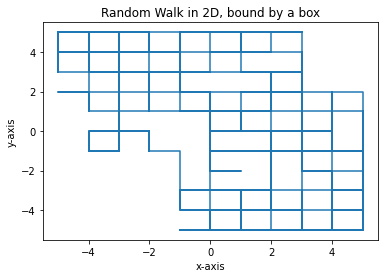

In [ ]:
import random
import matplotlib.pyplot as plt

def random_walk_in_box(steps):
  xlist = [0]
  ylist = [0]
  for i in range(steps):
    direction = random.choice(['up', 'down', 'left', 'right'])
    if direction == 'up':
      if ylist[-1] == 5:
        ylist.append(5)
      else:
        ylist.append(ylist[-1] + 1)

      xlist.append(xlist[-1])

    elif direction == 'down':
      if ylist[-1] == -5:
        ylist.append(-5)
      else:
        ylist.append(ylist[-1] - 1)
        
      xlist.append(xlist[-1])

    elif direction == 'left':
      if xlist[-1] == -5:
        xlist.append(-5)
      else:
        xlist.append(xlist[-1] - 1)
      
      ylist.append(ylist[-1])

    elif direction == 'right':
      if xlist[-1] == 5:
        xlist.append(5)
      else:
        xlist.append(xlist[-1] + 1)
      
      ylist.append(ylist[-1])


  return xlist, ylist

xlist, ylist = random_walk_in_box(500)
print(xlist)
print(ylist)

plt.plot(xlist, ylist)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Random Walk in 2D, bound by a box')
plt.show()

In this version of the random walk in a box, we modified the function to pick a direction based on angle, rather than the set up, down, left, right choices. We then plotted it using matplotlib. The function works as follows:

1. It sets an origin point at `x = 0` and `y = 0`
2. It chooses a random direction angle between 0 and 2 pi, and calculates the coordinates based on the cos and sin of that angle
3. It then calculates the new position by adding the new x coordinates to the previous coordinate
4. Checks whether the point is still within the bounds



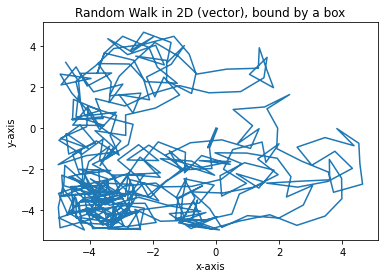

In [54]:
import random
import matplotlib.pyplot as plt
import math

def random_walk_in_box(steps):
    xlist = [0]
    ylist = [0]
    for i in range(steps):
        # choose a random direction and angle
        angle = random.uniform(0, 2*math.pi)
        x = math.cos(angle)
        y = math.sin(angle)
        
        # calculate the new position
        new_x = xlist[-1] + x
        new_y = ylist[-1] + y
        
        # check if new position is within the bounds of the box
        if -5 <= new_x <= 5 and -5 <= new_y <= 5:
            xlist.append(new_x)
            ylist.append(new_y)
        else:
            xlist.append(xlist[-1])
            ylist.append(ylist[-1])
    
    return xlist, ylist


xlist, ylist = random_walk_in_box(500)


plt.plot(xlist, ylist)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Random Walk in 2D (vector), bound by a box')
plt.show()


Now, we explore the random walk, but this time plotting each point in the random walk using the PIL. The function retains all of the processes from choosing the angle to the boundary check. However, in addition, it also creates an image using the Image and ImageDraw modules from PIL. Then, we use the `draw.eclipse` method to draw circles that have a radius of 2 to make them easier to see, and fill them with the RGB values for the color we wanted. We had trouble with the visibility of the dots, so we did some research online on how to scale them, and we came up with the solution to add the two following lines of code:



```
x = int((xlist[i] + 5) * 50) 
y = int((ylist[i] + 5) * 50)
```


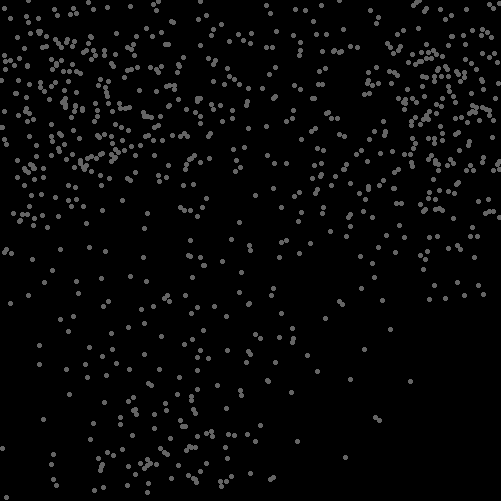

In [45]:
from PIL import Image, ImageDraw
import random
import math

def random_walk_in_box(steps):
    xlist = [0]
    ylist = [0]
    for i in range(steps):
        angle = random.uniform(0, 2*math.pi)
        x = math.cos(angle)
        y = math.sin(angle)
        
        new_x = xlist[-1] + x
        new_y = ylist[-1] + y
        
        if -5 <= new_x <= 5 and -5 <= new_y <= 5:
            xlist.append(new_x)
            ylist.append(new_y)
        else:
            xlist.append(xlist[-1])
            ylist.append(ylist[-1])
    



    img = Image.new('RGB', (501, 501), color = (0, 0, 0))
    draw = ImageDraw.Draw(img)

    for i in range(len(xlist)):
        x = int((xlist[i] + 5) * 50) 
        y = int((ylist[i] + 5) * 50)
        draw.ellipse((x-2, y-2, x+2, y+2), fill=(100, 100, 100))

    return img


img = random_walk_in_box(1000)
img.show()

Lastly, this function tries to plot the distribution of the ending points of random walks up to a certain number input. The function initializes the window size, center coordinates, and creates and draws the image using the `Image.new`  and `ImageDraw.Draw` methods. Then each walk runs and the function plots the end point of each random walk. Just like the previous function, we use the `draw.eclipse` method to draw circles that have a radius of 1 to make them easier to see. We ran into issues with scaling because if we increased the image size, it would throw off the coordinates for each of the pixels that was an end point for the random walk. ***COME BACK TO TRY SCALAR FIX FROM PREVIOUS FUNCTION


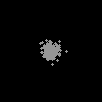

In [56]:
from PIL import Image, ImageDraw
import random
import math

def random_walk_distribution(num_walks):
    width, height = 102, 102
    center_x, center_y = width // 2, height // 2
    img = Image.new('RGB', (width, height), color=(0, 0, 0))
    draw = ImageDraw.Draw(img)

    for i in range(1, num_walks):
        x, y = center_x, center_y

        # random wakl loop
        for _ in range(random.randint(1, 50)):
            angle = random.uniform(0, 2*math.pi)
            x += math.cos(angle)
            y += math.sin(angle)

        draw.ellipse((x-1, y-1, x+1, y+1), fill=(150, 150, 150))

    return img



img = random_walk_distribution(250)
img.show()